Choose a dataset from the following Pytorch Website

For Girls :  Fashion-MNIST Dataset (https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST)


For Boys: Flowers102 (https://pytorch.org/vision/stable/generated/torchvision.datasets.Flowers102.html#torchvision.datasets.Flowers102)


Implement all the necessary steps for applying CNN Model.
batch size should be 15 and kernal size should be 4*4




In [ ]:
import torch

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 19709146.49it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 301159.40it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5486866.85it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4487173.11it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [ ]:
print(train_data.targets.size())

torch.Size([60000])


In [ ]:
test_data.data.size()

torch.Size([10000, 28, 28])

In [ ]:
test_data.targets.size()

torch.Size([10000])

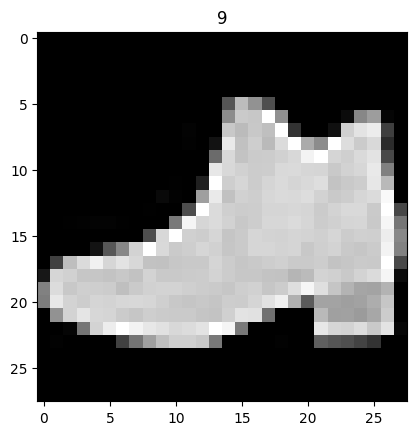

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[15], cmap='gray')
plt.title('%i' % train_data.targets[15])
plt.show()

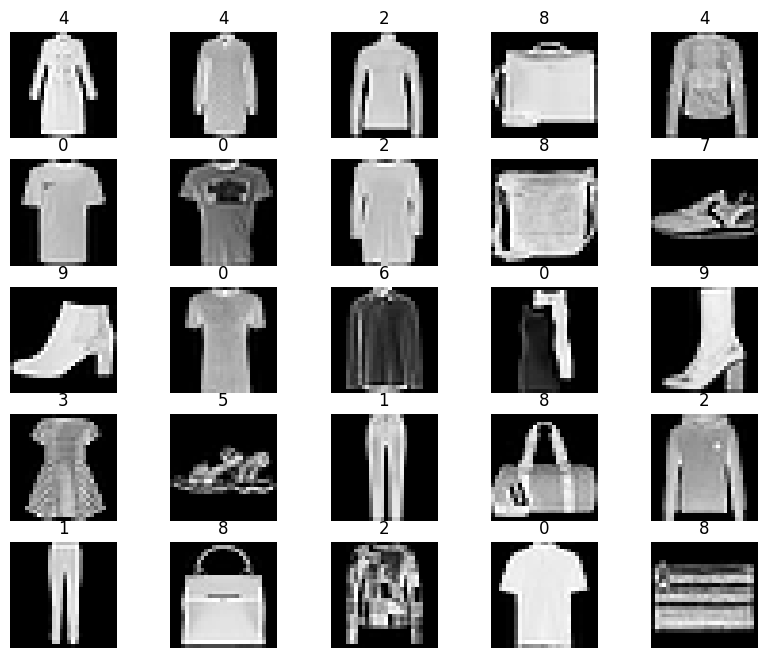

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    #convert 3D, into 2D
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
img.squeeze().size()

torch.Size([28, 28])

In [ ]:
img.size()

torch.Size([1, 28, 28])

In [ ]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=15,
                                          shuffle=True,
                                          num_workers=1),

    'test'  : torch.utils.data.DataLoader(test_data,
                                          batch_size=15,
                                          shuffle=True,
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7b230b1751b0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7b230b177370>}

In [ ]:
import torch.nn as nn       #Importing Neural Network
class CNN(nn.Module): #Defining CNN class and inheriting it from Neural Network Module Class.
    def __init__(self):
        super(CNN, self).__init__()  #Calling Parent Constructor
        self.conv1 = nn.Sequential(               #First Layer
            nn.Conv2d(
                in_channels=1,       #in_channel is 1, bcz its gray image, if its coloured image it will be 3(Red, Green, and Blue)
                out_channels=16,            #out_channel , outputs produced by the input channel
                kernel_size=4,              #Selection of small matrix from the image tensor
                stride=1,                   #number of pixel to be passed in the Cnn layer
                padding=2,                  #Additional size added to the kernal matrix
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(             #Hidden Layers
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x

In [ ]:
cnn = CNN()   #calling CNN constructor
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [ ]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [ ]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):

    cnn.train()

    # Train the model
    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):

            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/4000], Loss: 0.7528
Epoch [1/10], Step [200/4000], Loss: 0.3992
Epoch [1/10], Step [300/4000], Loss: 0.5056
Epoch [1/10], Step [400/4000], Loss: 0.1981
Epoch [1/10], Step [500/4000], Loss: 0.5752
Epoch [1/10], Step [600/4000], Loss: 0.3886
Epoch [1/10], Step [700/4000], Loss: 0.3587
Epoch [1/10], Step [800/4000], Loss: 0.0593
Epoch [1/10], Step [900/4000], Loss: 0.4442
Epoch [1/10], Step [1000/4000], Loss: 0.5493
Epoch [1/10], Step [1100/4000], Loss: 0.4922
Epoch [1/10], Step [1200/4000], Loss: 0.0917
Epoch [1/10], Step [1300/4000], Loss: 0.5024
Epoch [1/10], Step [1400/4000], Loss: 0.9251
Epoch [1/10], Step [1500/4000], Loss: 0.6027
Epoch [1/10], Step [1600/4000], Loss: 0.2285
Epoch [1/10], Step [1700/4000], Loss: 0.2828
Epoch [1/10], Step [1800/4000], Loss: 0.2728
Epoch [1/10], Step [1900/4000], Loss: 0.8660
Epoch [1/10], Step [2000/4000], Loss: 0.2656
Epoch [1/10], Step [2100/4000], Loss: 0.3304
Epoch [1/10], Step [2200/4000], Loss: 0.6116
Epoch [1/10], Step 

In [ ]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))


        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

test()

Test Accuracy of the model on the 10000 test images: 0.70


In [ ]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [ ]:
actual_number = lbls[:10].numpy()
actual_number

array([8, 4, 3, 2, 2, 8, 1, 2, 6, 7])

In [ ]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [8 4 3 2 2 8 1 4 2 7]
Actual number: [8 4 3 2 2 8 1 2 6 7]
